In [1]:
!pip install xgboost

In [2]:
import xgboost as xgb
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
raw_dataset = pd.read_csv('AG_G_dataset-PTC.csv')

x = raw_dataset.iloc[:, : -1].values
y = raw_dataset.iloc[:, 11].values
raw_dataset

,DAT(days),Temp,WC,NL,N(PTC) (mg/g),P(PTC) (mg/g),K(PTC) (mg/g),Ca(PTC) (mg/g),Mg(PTC) (mg/g),S(PTC) (mg/g),Na(PTC) (mg/g),Diameter of Bulb(mm)
0,1,18.3,0.08,7.00,33.55,4.90,37.29,7.25,2.13,1.94,0.78,19.77
1,2,19.8,0.13,7.13,34.62,4.91,38.53,7.35,2.12,1.95,0.79,20.34
2,3,18.3,0.24,7.21,35.28,4.92,39.64,7.36,2.11,1.96,0.80,20.50
3,4,16.9,0.36,7.34,36.18,4.93,40.18,7.48,2.10,1.97,0.81,20.62
4,6,18.9,0.48,7.46,37.49,4.94,41.75,7.49,2.00,1.98,0.82,20.73
...,...,...,...,...,...,...,...,...,...,...,...,...
86,89,29.5,16.17,15.85,34.98,6.50,45.75,11.38,1.56,2.85,1.46,118.21
87,90,27.9,16.29,15.88,34.76,6.51,45.76,11.42,1.57,2.86,1.45,119.00
88,91,27.1,16.38,15.00,34.63,6.52,45.77,11.49,1.58,2.99,1.44,120.63
89,92,26.1,16.47,14.95,34.51,6.53,45.78,11.53,1.63,3.22,1.43,120.95


In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)


In [5]:
%%time
xgbr = xgb.XGBRegressor(verbosity=0)
#print(xgbr)

xgbr.fit(xtrain, ytrain)
 
score = xgbr.score(xtrain, ytrain)   
print("Training score: ", score) 
 
# - cross validataion 
scores = cross_val_score(xgbr, xtrain, ytrain, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 
ypred = xgbr.predict(xtest)
r2 = 1 - sum((ytest - ypred) ** 2)/sum((ytest - np.mean(ytest)) ** 2)
#r2 = r2_score(ytest,ypred)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))



Training score:  0.999999998164968
Mean cross-validation score: 0.99
K-fold CV average score: 1.00
MSE: 3.49
RMSE: 1.87
Wall time: 1.35 s


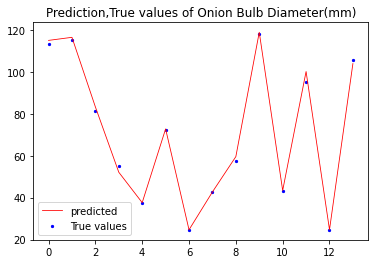

In [13]:
x_ax = range(len(ytest))
plt.title('Prediction,True values of Onion Bulb Diameter(mm)')
plt.scatter(x_ax, ytest, s=5, color="blue", label="True values")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [7]:
print('ypred =',ypred)

ypred = [115.108315 116.57386   83.352104  52.138935  37.61723   72.826004
  24.647978  42.723446  59.59171  118.99886   43.42097  100.247444
  24.686228 104.0479  ]


In [8]:
print('r2_score =',r2)

r2_score = 0.9968059181967345
